## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 3: Machine Learning Experiments</p>
## <p style="text-align: center;">Total points: 10</p>
## <p style="text-align: center;">Due: Wednesday, 9th October submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

In this Problem Set we will solve the Unsupervised problem using k-means clustering algorithm. 

## Task 1
Read the wine data from the link provided below. 
Split the wind data into X and y. The X should have the features associated with each class of wine. The y should indicate the type of wine. 

Peform PCA and extract the top two components. 

Generate a scatter plot for the 2 components generated by PCA. Do they appear to be in  clusters of 3? 

The referece plot is given below. 

### Read the data

In [8]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
len(df_wine)

178

In [38]:
np.unique(df_wine['Class label'])

array([1, 2, 3])

In [76]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.30, random_state=123)

### Standardize the data

In [77]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [78]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.35515711, 0.21222703, 0.10282865, 0.07642457, 0.0621589 ,
       0.04574064, 0.038754  , 0.02680474, 0.0234847 , 0.02266076,
       0.01488421, 0.01156267, 0.00731202])

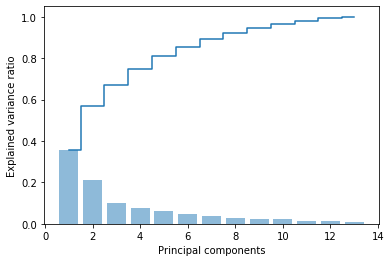

In [79]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

### Run PCA with top 2 components

In [80]:
pca = PCA(n_components=2)
X_train_pca_scikit = pca.fit_transform(X_train_std)
X_test_pca_scikit = pca.transform(X_test_std)

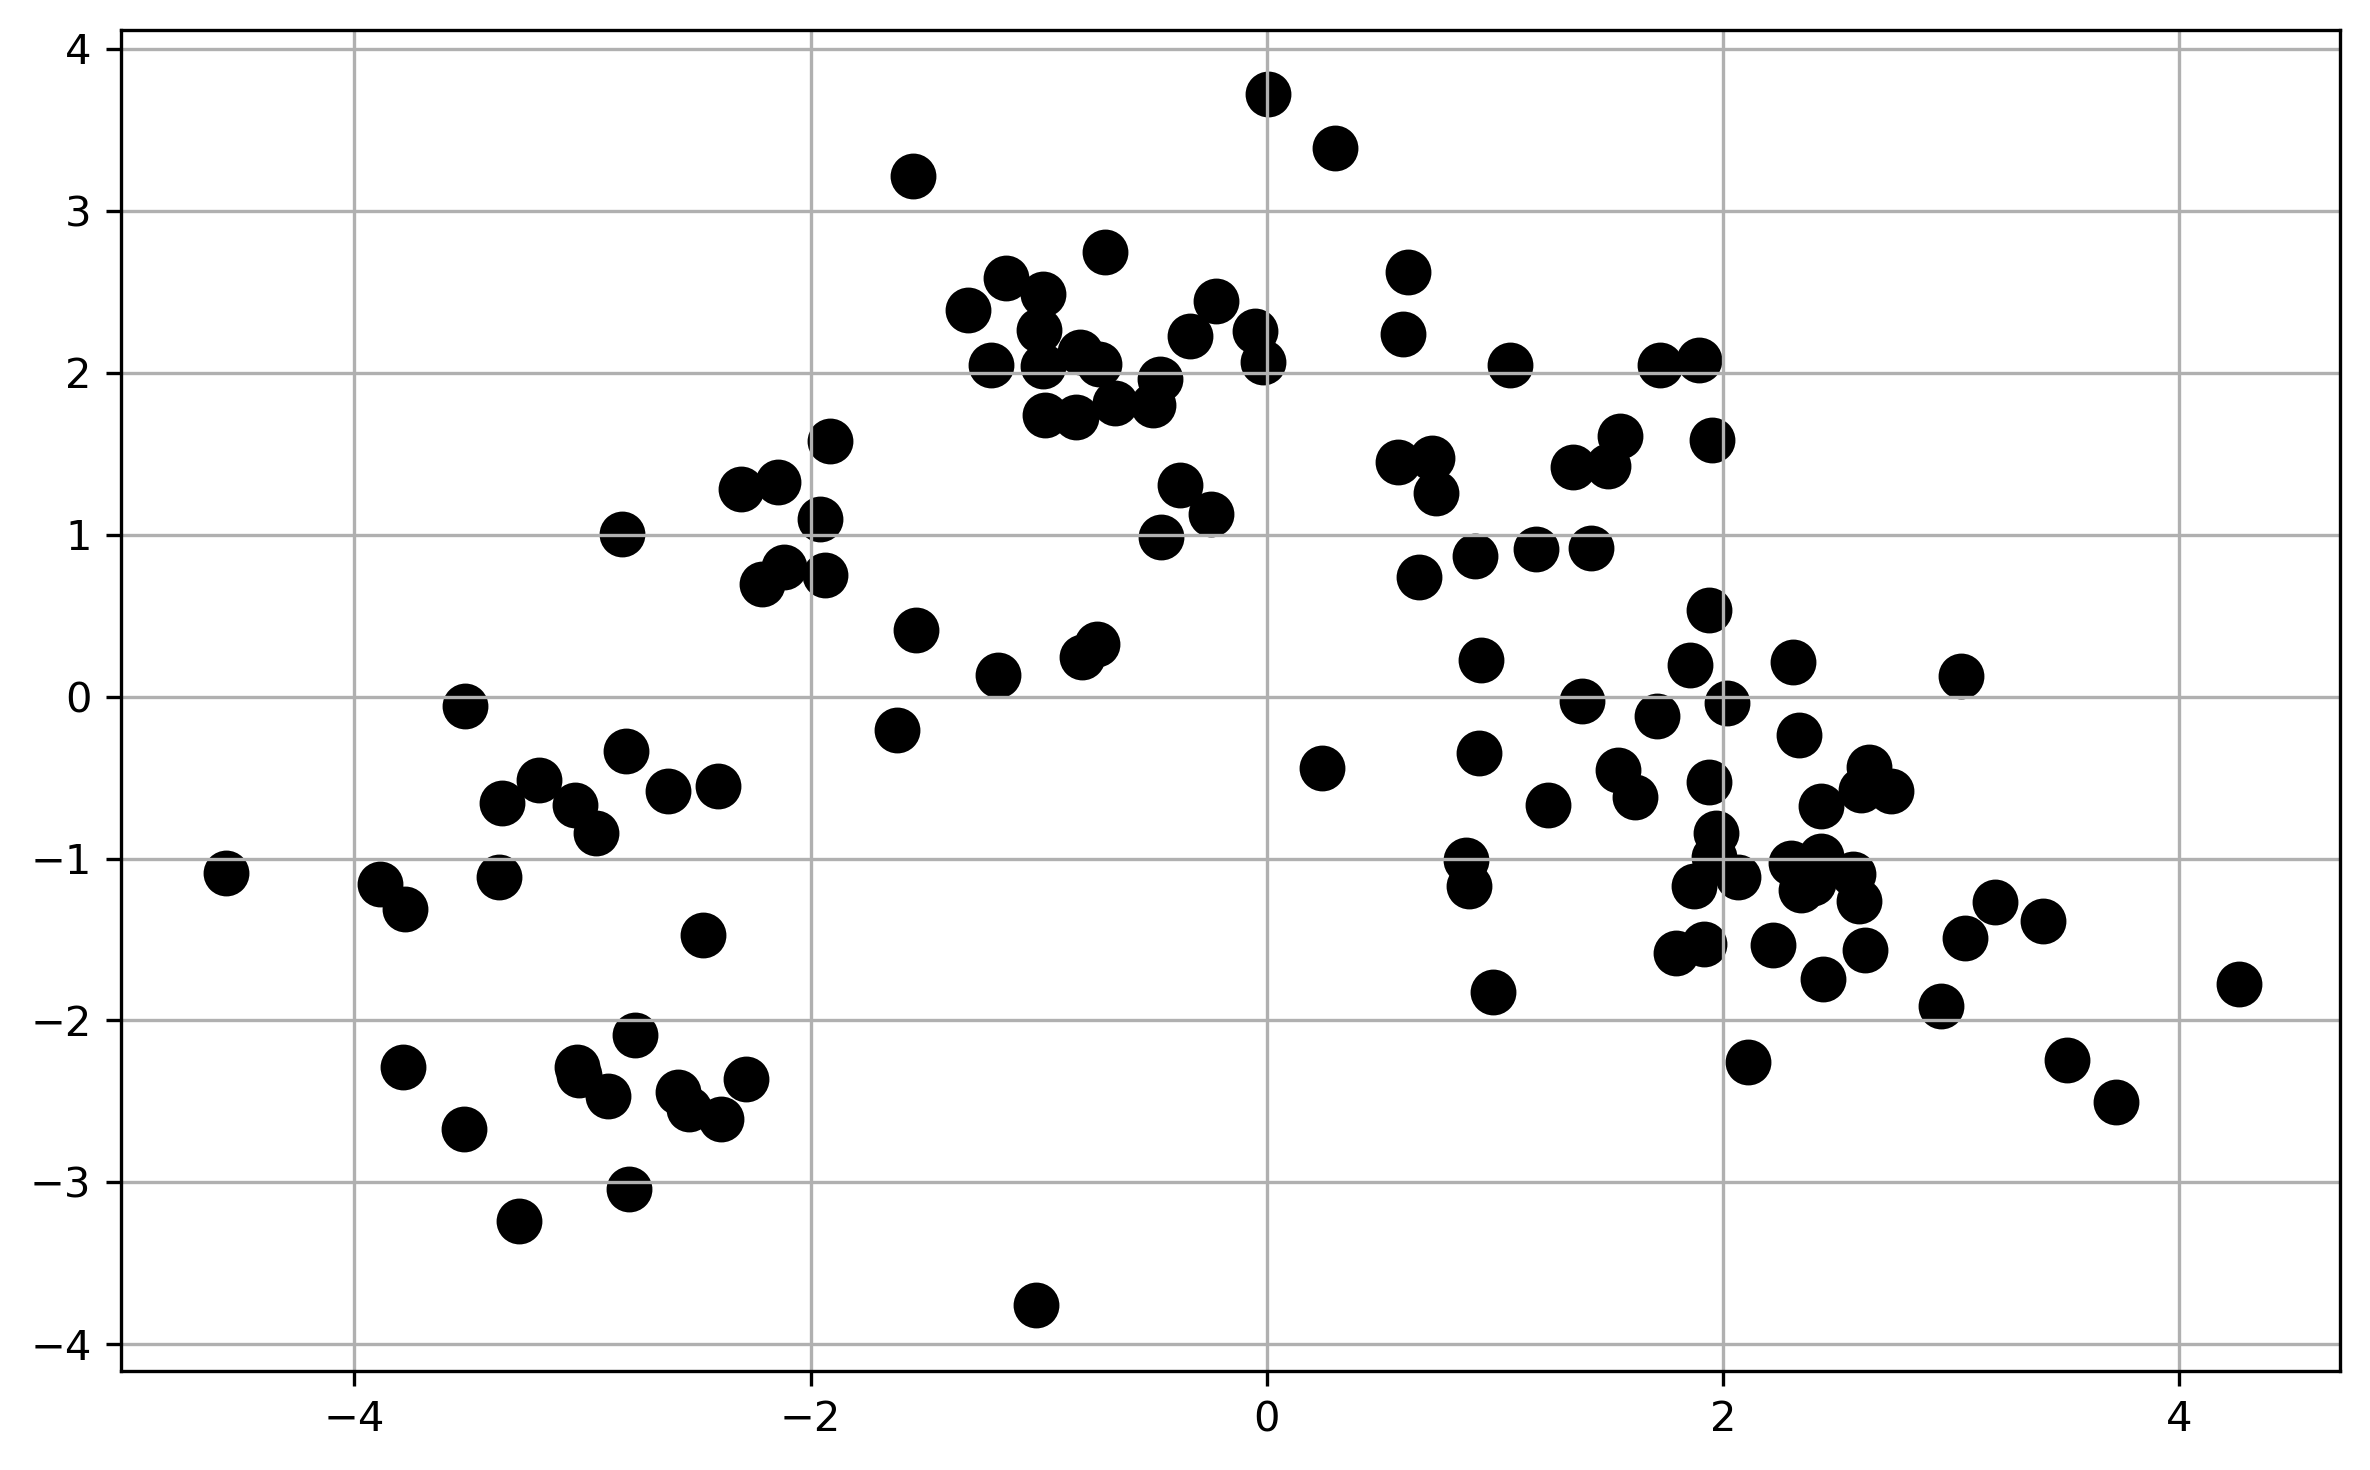

In [122]:
plt.figure(figsize=(8,5),dpi=300)

for label in range(1,4):

    plt.scatter(x=-1*X_train_pca_scikit[:,0][y_train == label],
                y=-1*X_train_pca_scikit[:,1][y_train == label],
                marker='o',
                color='black',
                s=100)       

plt.grid()
plt.tight_layout()
plt.show()

### <font color='orange'>The transformed features do appear to have gathered in clusters of 3 with left, right & top alignment in the above scatter plot.</font>

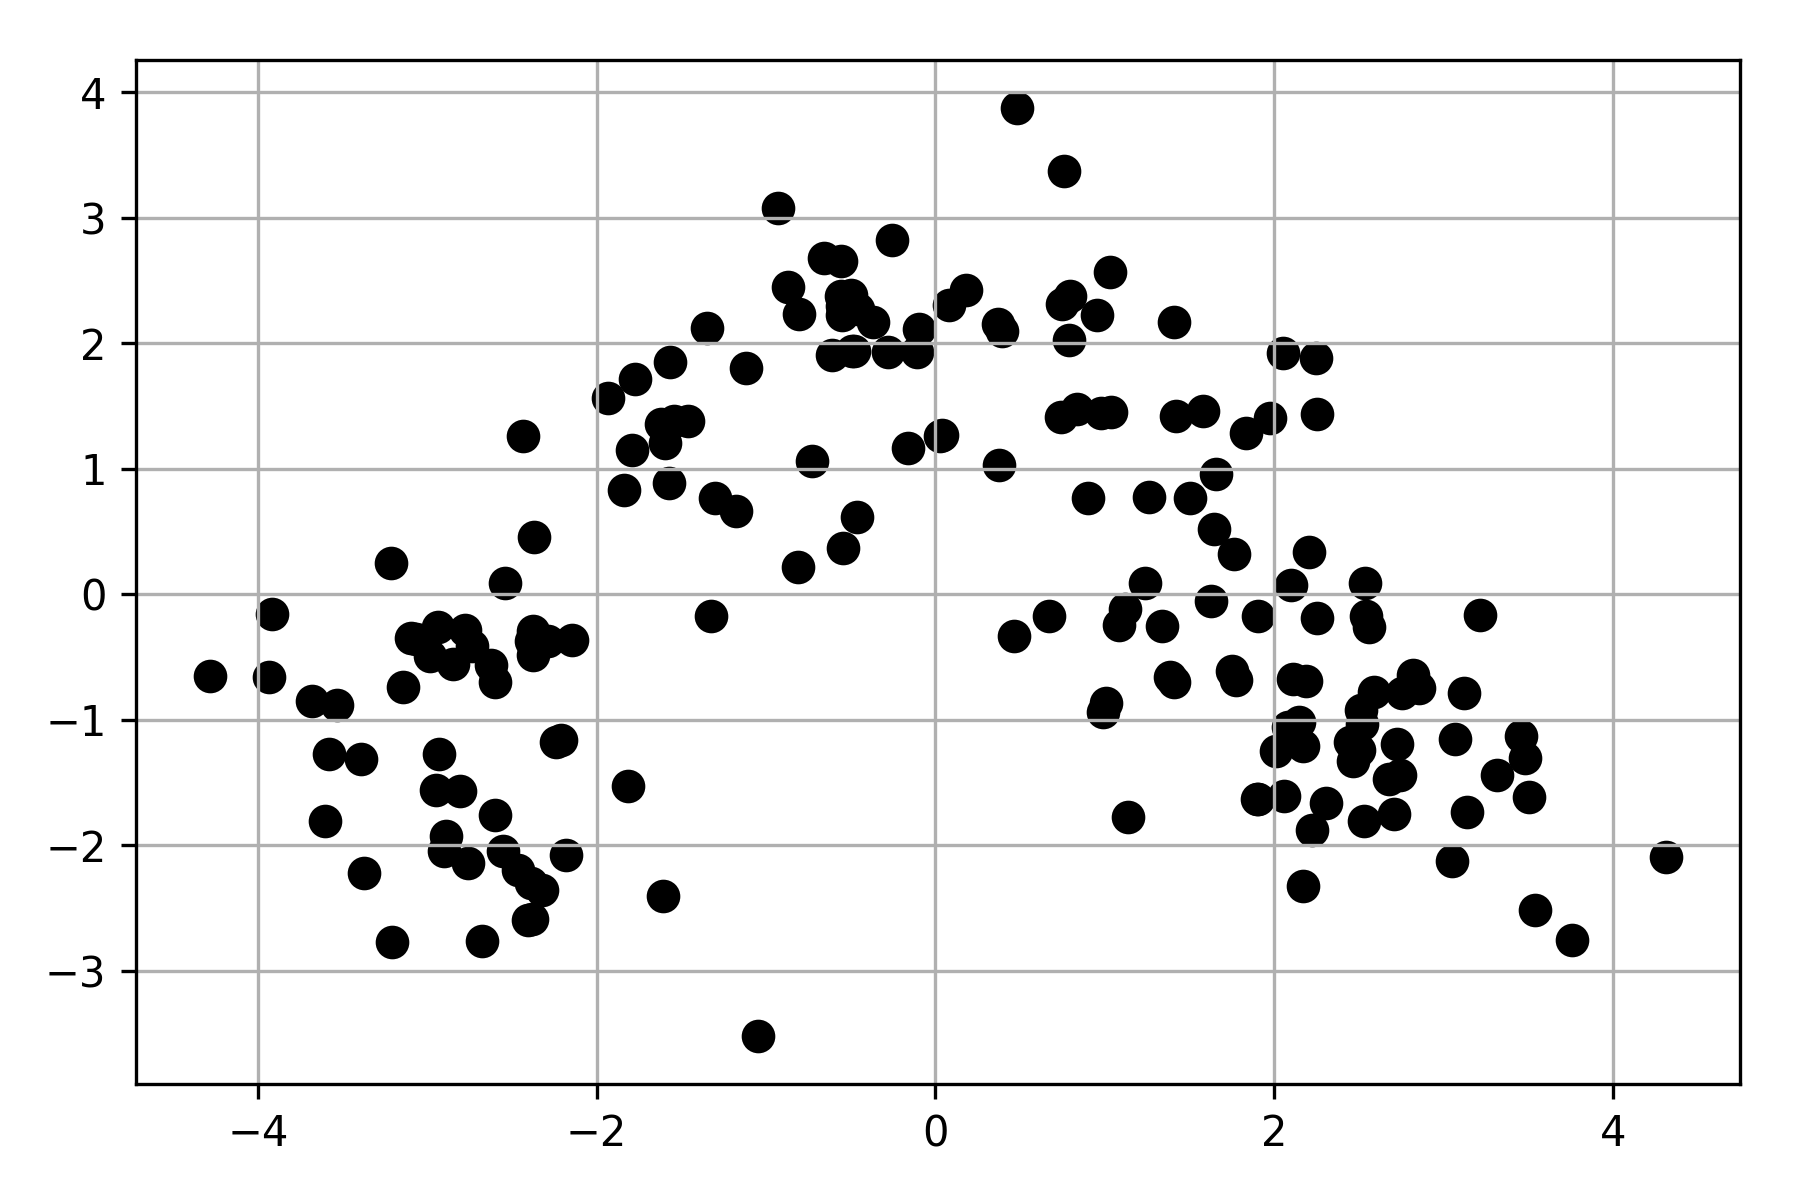

In [1]:
from IPython.display import Image
Image(filename=r'Blobs.png')

## Task 2
Run a k-means clustering model for the input data. This should generate the cluster centoids. Perform this for a value of k=3 and plot the cluster centroid vs. data points in that cluster as a scatter plot. 

To check how well k-means performed, print the prediction accuracy and plot the confusion matrix. 
It is not straightforward to print the accuracy score. Makesure to match the predicted wine class to the original wine class and then print the accuracy. 

Reference plot is given below: 

### K-Means Clustering

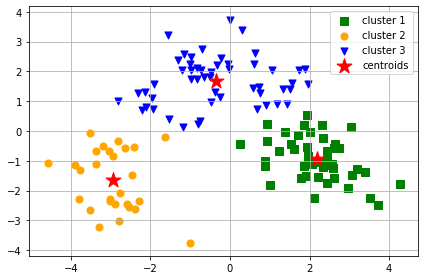

In [273]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10,    
            max_iter=300,
            tol=1e-04, 
            random_state=None,
            algorithm = 'auto')
y_km = km.fit_predict(X_train_pca_scikit)

plt.scatter(-1*X_train_pca_scikit[y_km == 0, 0],
            -1*X_train_pca_scikit[y_km == 0, 1],
            s=50,
            c='green',
            marker='s',
            label='cluster 1')
plt.scatter(-1*X_train_pca_scikit[y_km == 1, 0],
            -1*X_train_pca_scikit[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(-1*X_train_pca_scikit[y_km == 2, 0],
            -1*X_train_pca_scikit[y_km == 2, 1],
            s=50,
            c='blue',
            marker='v',
            label='cluster 3')
plt.scatter(-1*km.cluster_centers_[:, 0],
            -1*km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

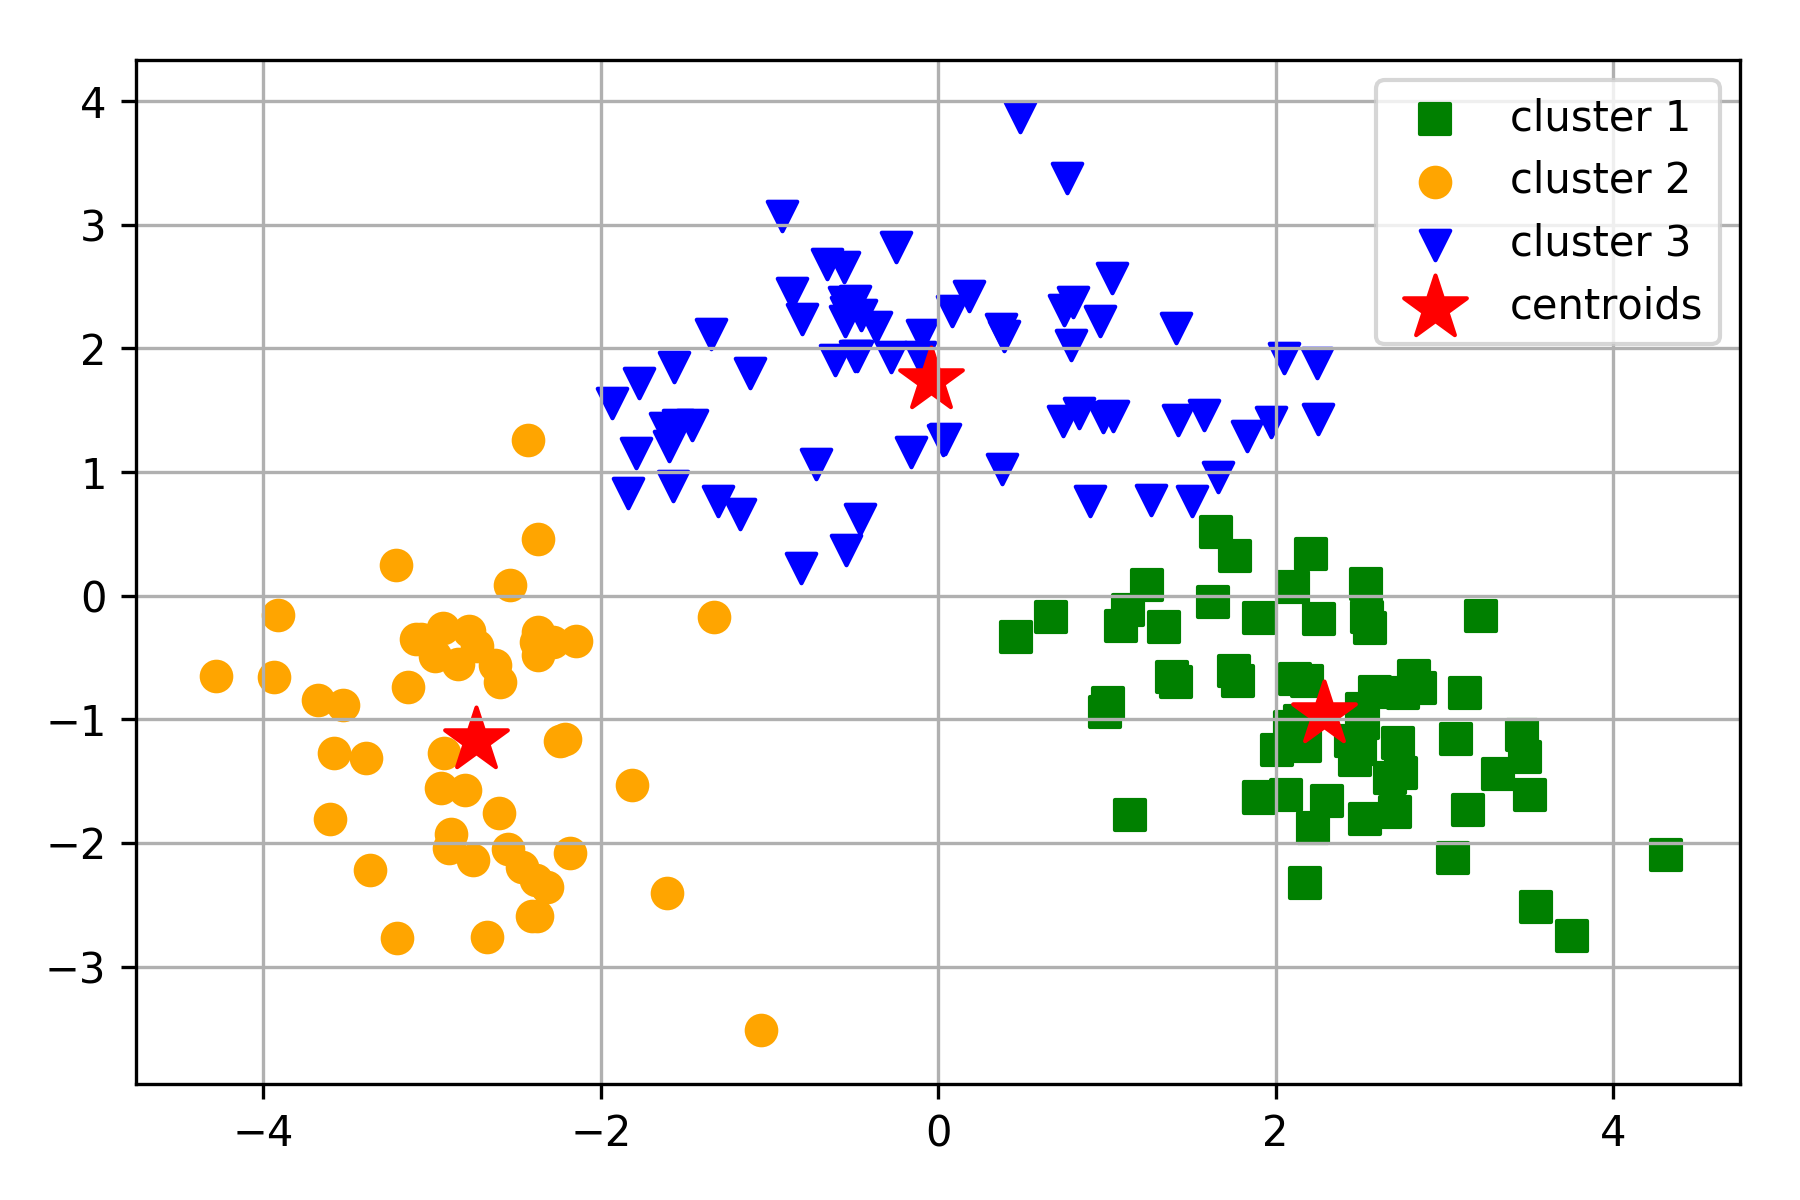

In [191]:
Image(filename=r'centroids.png')

### Match predicted labels with true labels using most common value for a cluster

In [274]:
km.labels_

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0,
       1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2], dtype=int32)

In [276]:
pd.value_counts(km.labels_)

2    52
0    45
1    27
dtype: int64

In [277]:
pd.value_counts(y_train)

2    53
1    45
3    26
dtype: int64

In [290]:
labels = np.zeros_like(km.labels_)

In [291]:
from scipy.stats import mode

# Match predicted labels with true labels using most common value for a cluster
for i in range(0,3):
    mask = (km.labels_ == i)
    labels[mask] = mode(y_train[mask])[0]

In [317]:
labels

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 3, 1, 1, 1, 3,
       2, 2, 2, 3, 2, 1, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 3, 1, 3, 1, 1, 3, 2, 3, 1, 1, 2, 1,
       3, 2, 2, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 2, 1, 1, 1, 2, 3, 2, 3, 3, 2, 1,
       1, 1, 3, 2, 2, 1, 2, 2, 3, 1, 2, 2, 2, 2], dtype=int32)

In [318]:
y_train

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 3, 1, 1, 1, 3,
       2, 2, 2, 3, 1, 1, 2, 2, 2, 3, 3, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 3, 1, 3, 1, 1, 3, 2, 3, 1, 1, 2, 1,
       3, 2, 2, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 2, 1, 1, 1, 2, 3, 2, 3, 3, 2, 1,
       2, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2])

### Calculate Accuracy Score

In [319]:
from sklearn.metrics import accuracy_score

print("Accuracy Score:",accuracy_score(y_train, labels))

Accuracy Score: 0.9758064516129032


### Plot Confusion Matrix

In [327]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_train, y_pred=labels, labels=[1,3,2])
print(confmat)

[[44  0  1]
 [ 0 26  0]
 [ 1  1 51]]


Text(0.5, 1.05, 'Confusion Matrix')

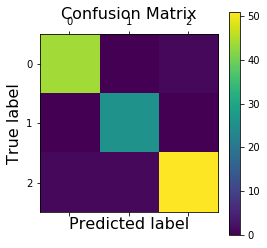

In [328]:
plt.matshow(confmat)
plt.colorbar()
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.title('Confusion Matrix', fontsize=16)

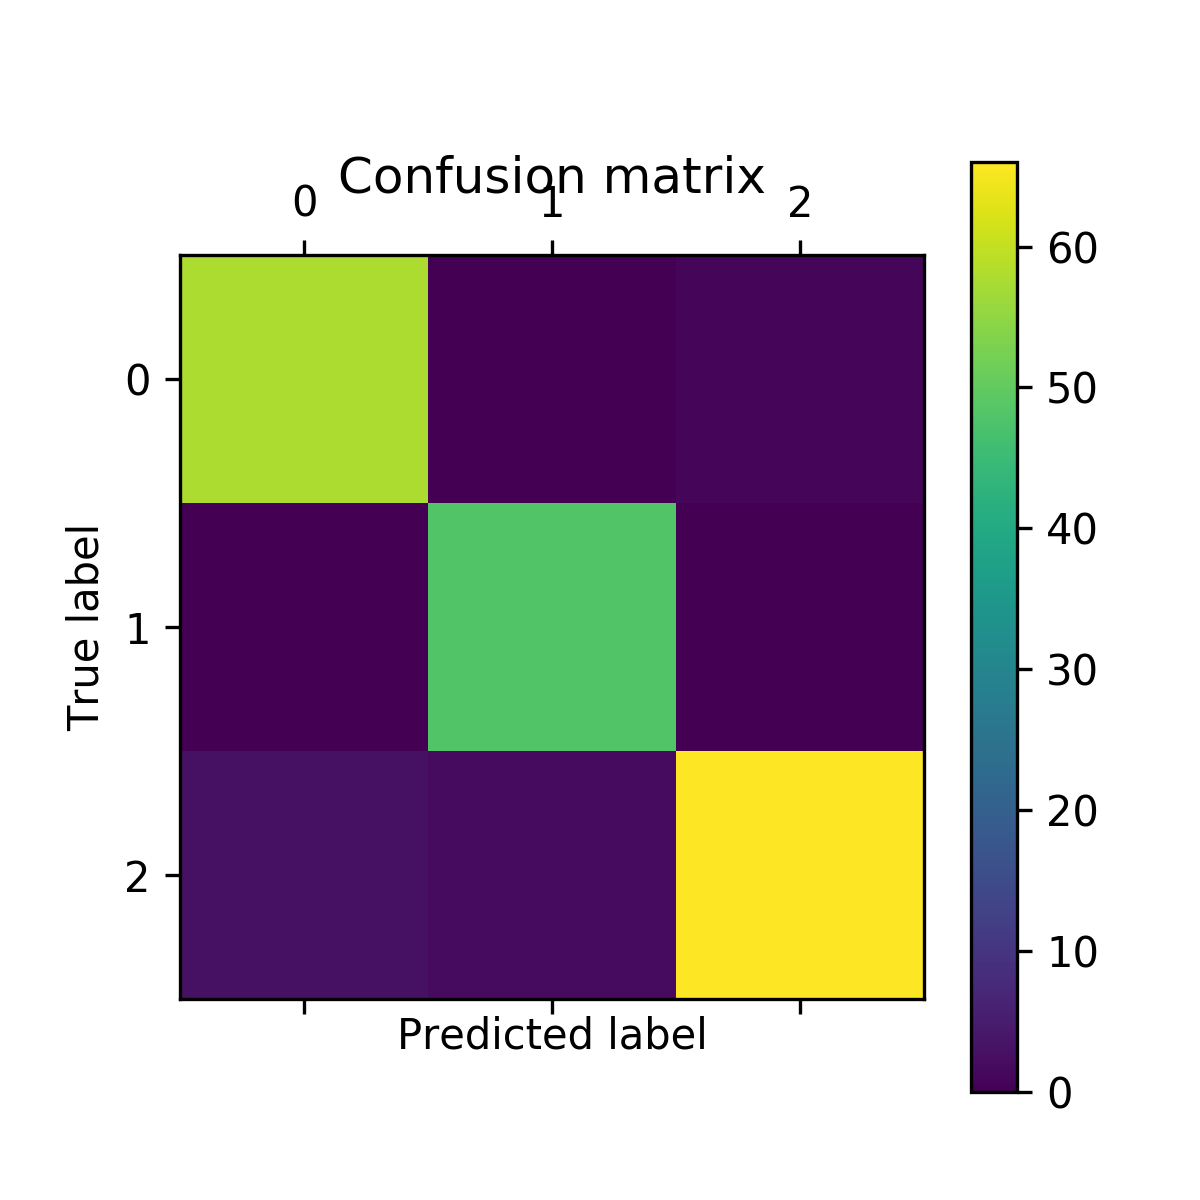

In [0]:
Image(filename=r'confusion.png')

## Task 3

Run the KMeans model for different values of $k$ and plot the distortions in each case and identify the elbow of the curve for PCA'ed dataset with n=2 components. 

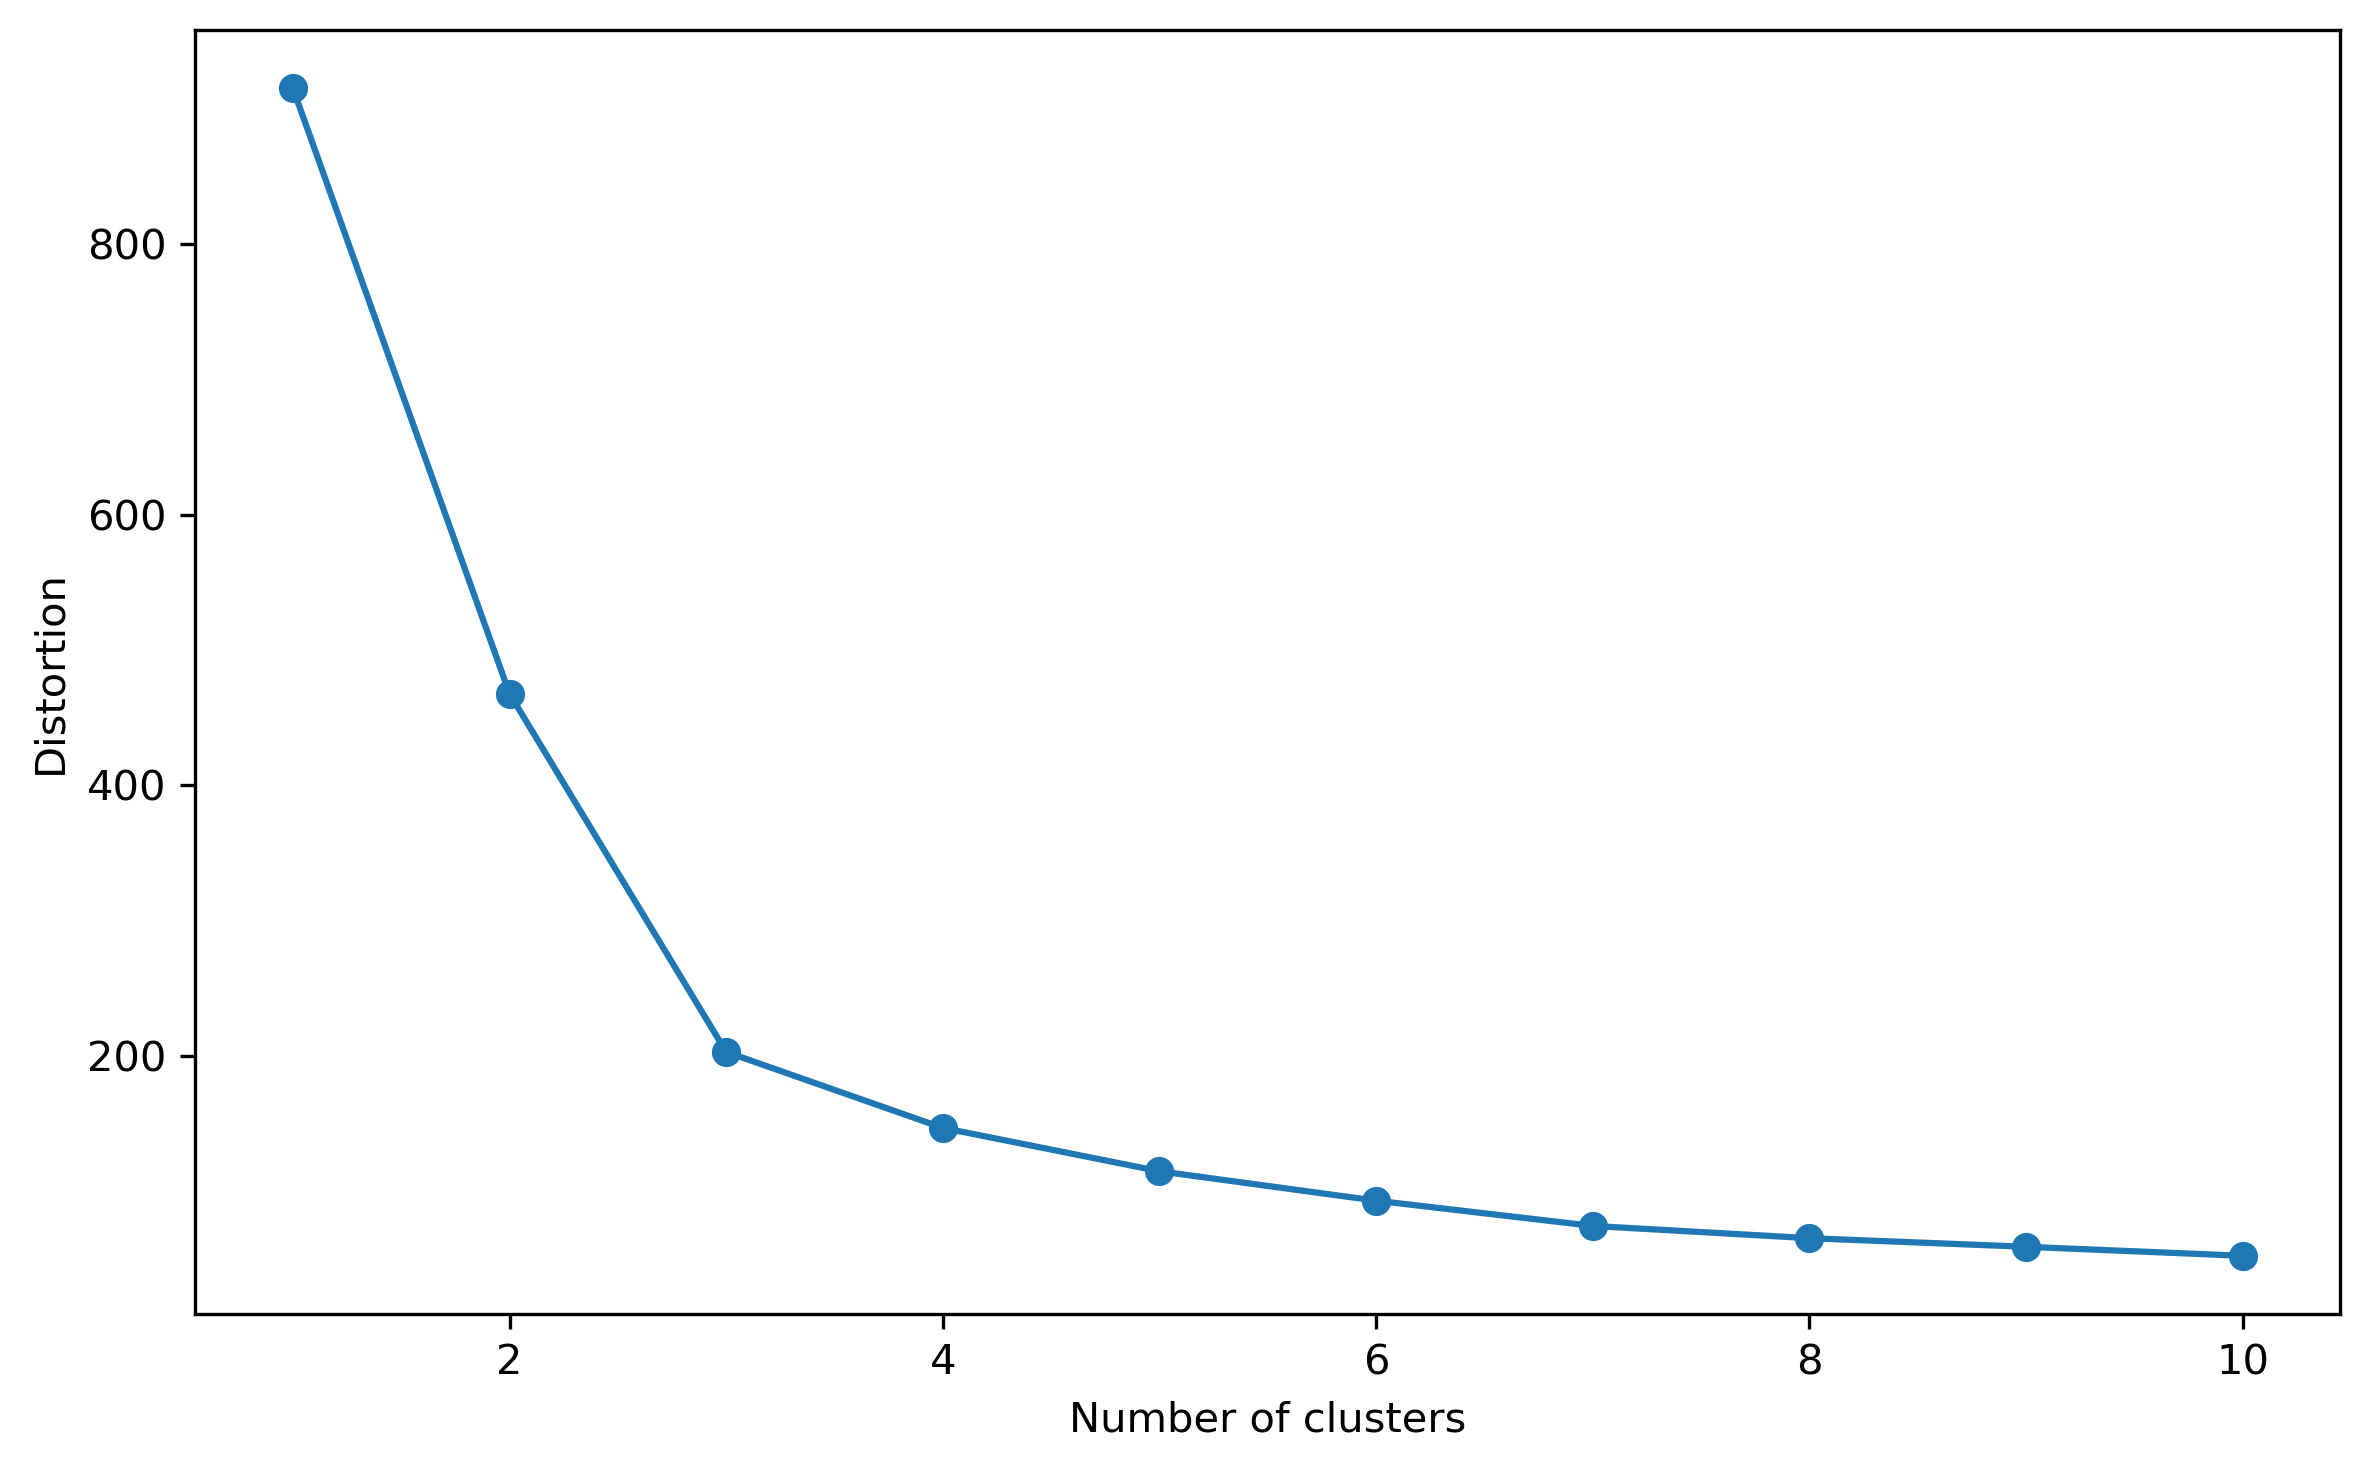

In [187]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
            init='k-means++', 
            n_init=10,    
            max_iter=300, 
            random_state=None,
            algorithm = 'auto')
    km.fit(X_train_pca_scikit)
    distortions.append(km.inertia_)
    
plt.figure(figsize=(8,5),dpi=300)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### <font color='orange'> Optimal value for k is 3</font>

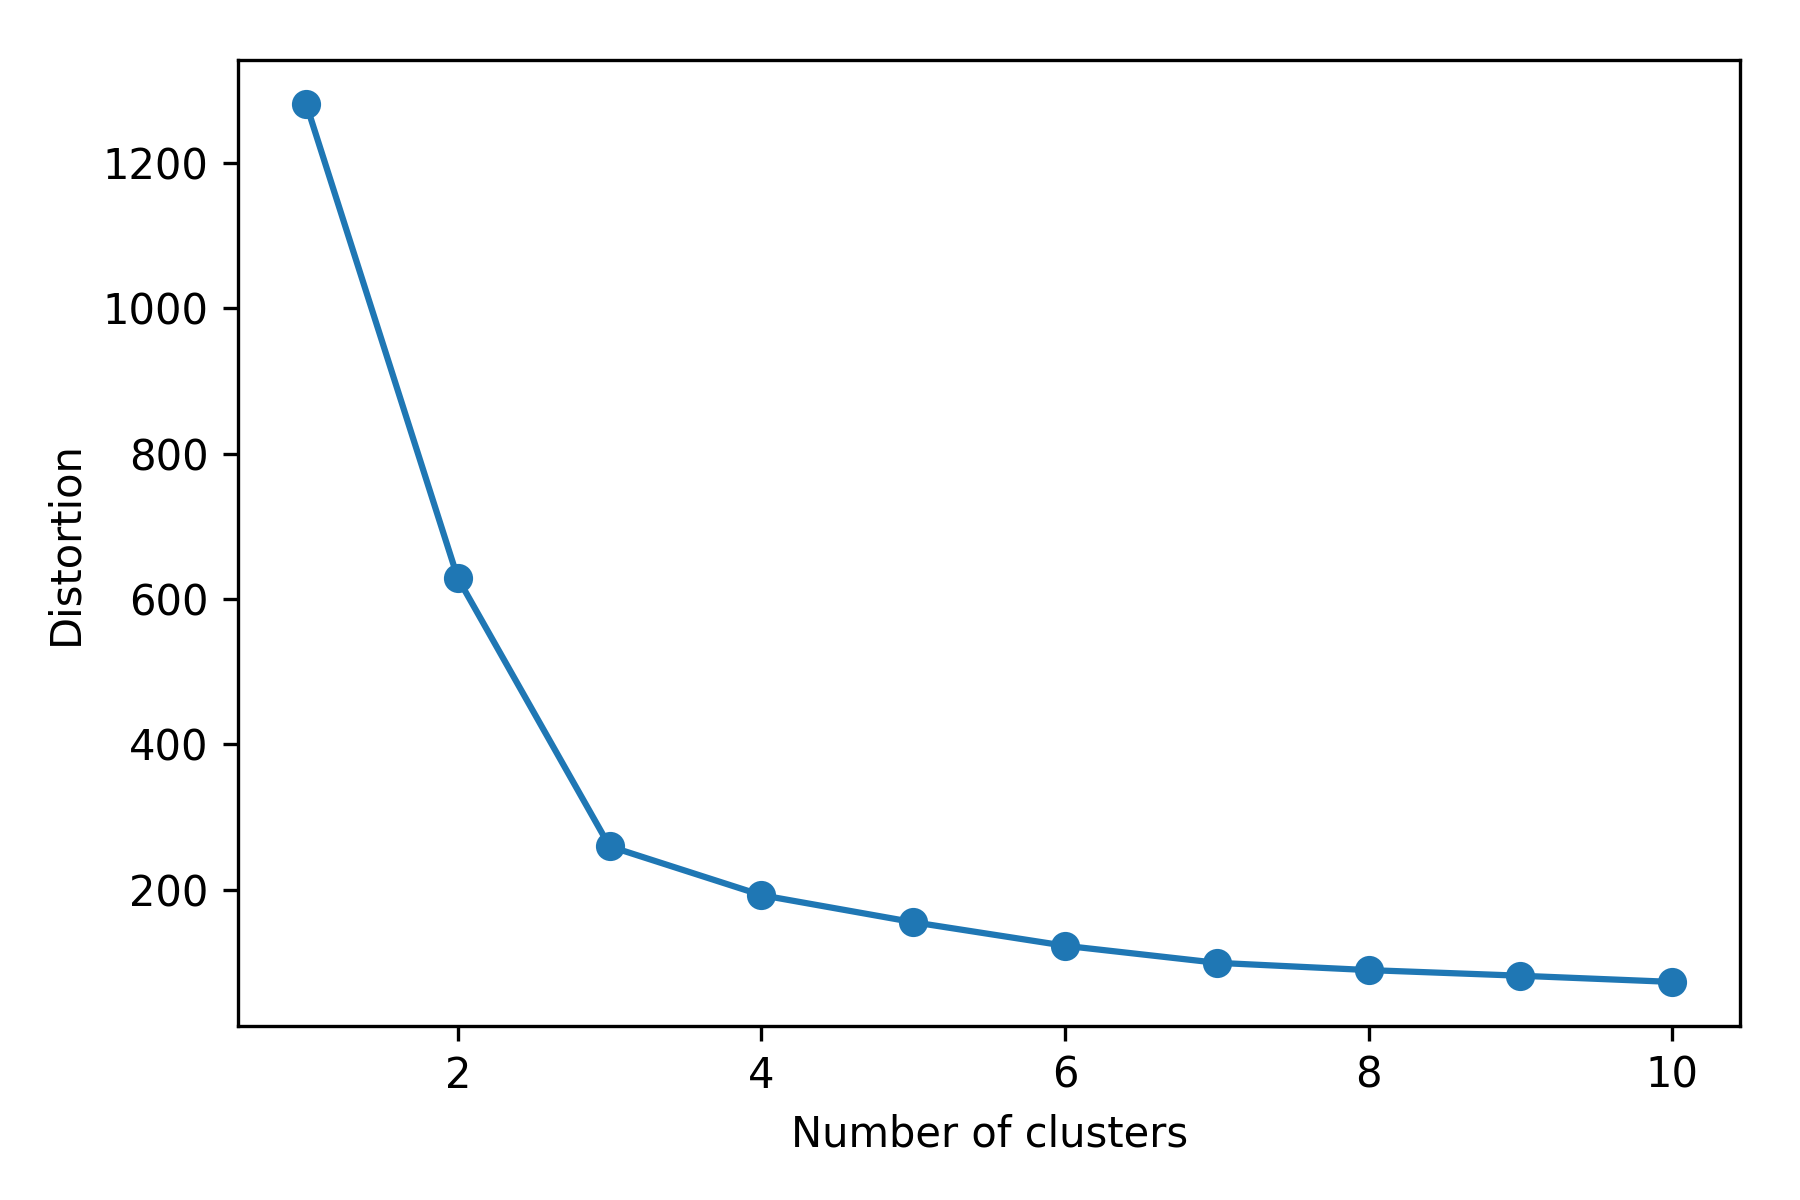

In [0]:
Image(filename=r'elbow.png')